# Question - 3

## Importing Libraries

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline
sns.set_palette("colorblind")
sns.set_style('whitegrid')

## Reading Data and Exploratory Data Analysis

In [2]:
stock_data = pd.read_csv('NSE-TATAGLOBAL11.csv')

In [3]:
stock_data.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [4]:
stock_data.xs(key='Close',axis=1).max()

325.75

In [5]:
returns  = pd.DataFrame()

In [6]:
returns['Return']  = stock_data['Close'].pct_change()

In [7]:
returns.head()

,Return
0,NaN
1,-0.027655
2,0.043021
3,0.043080
4,0.014499


In [8]:
import seaborn as sns

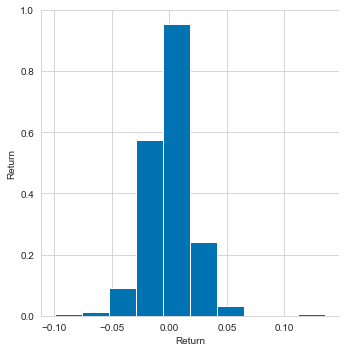

In [9]:

sns.pairplot(returns[1:], height=5, )

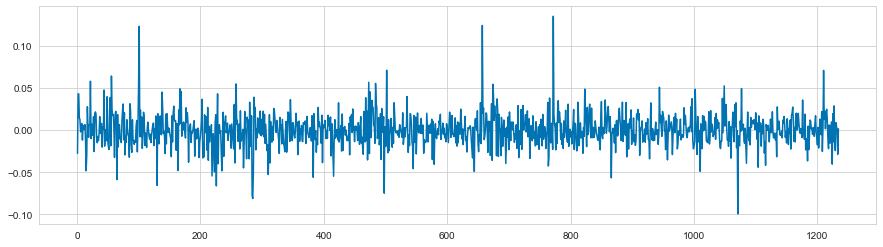

In [10]:
plt.figure(figsize=(15,4))
plt.plot(returns)

In [11]:

sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

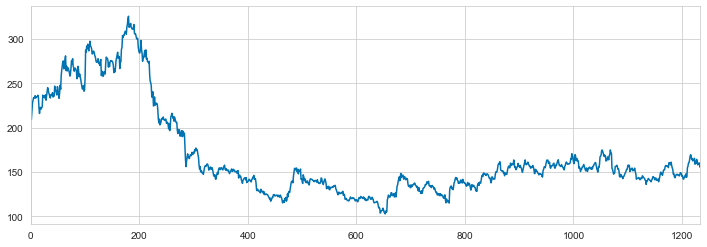

In [12]:
stock_data['Close'].plot(figsize=(12,4))

## Moving Average

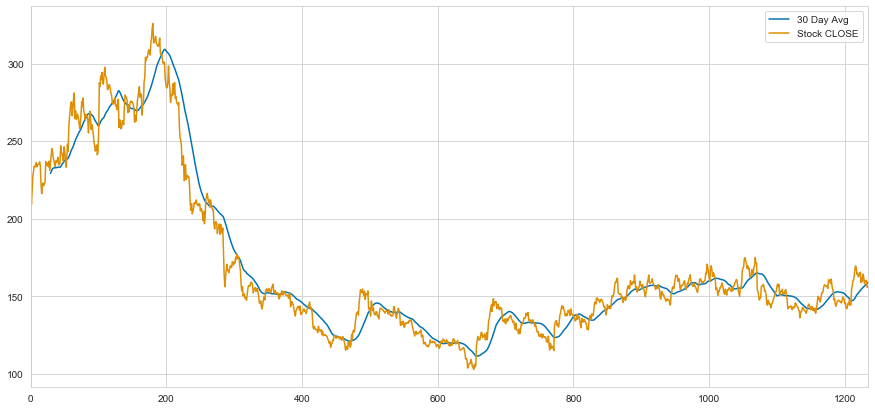

In [13]:
plt.figure(figsize=(15,7))
stock_data['Close'].rolling(window=30).mean().plot(label='30 Day Avg')
stock_data['Close'].plot(label='Stock CLOSE')
plt.legend()

In [14]:
from sklearn import metrics

In [15]:
y_true = stock_data['Close']

In [16]:
y_true.head()

0    215.15
1    209.20
2    218.20
3    227.60
4    230.90
Name: Close, dtype: float64

In [17]:
y_pred = stock_data['Close'].rolling(window=30).mean()

In [18]:
y_pred.head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Close, dtype: float64

In [19]:
for x in range(30):
    y_pred[x]=200

In [20]:
y_pred.head()

0    200.0
1    200.0
2    200.0
3    200.0
4    200.0
Name: Close, dtype: float64

### Results

In [21]:
print("FOR MOVING AVERAGE \n")

print('MAE:', metrics.mean_absolute_error(y_true, y_pred))
print('MSE:', metrics.mean_squared_error(y_true, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_true, y_pred)))

FOR MOVING AVERAGE 

MAE: 8.280028340080982
MSE: 138.6518415002251
RMSE: 11.775051655947209


## Linear Regression

In [22]:
X = stock_data[['Open', 'High', 'Low', 'Last', 'Total Trade Quantity' , 'Turnover (Lacs)']]

In [23]:
X.head()

,Open,High,Low,Last,Total Trade Quantity,Turnover (Lacs)
0,208.00,222.25,206.85,216.00,4642146.0,10062.83
1,217.00,218.60,205.90,210.25,3519515.0,7407.06
2,223.50,227.80,216.15,217.25,1728786.0,3815.79
3,230.00,237.50,225.75,226.45,1708590.0,3960.27
4,234.55,234.60,221.05,230.30,1534749.0,3486.05


In [24]:
y = stock_data['Close']
y.head()

0    215.15
1    209.20
2    218.20
3    227.60
4    230.90
Name: Close, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
lm = LinearRegression()

In [29]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-5.90855722e-02  8.87358244e-02  8.25872605e-02  8.86838384e-01
 -4.91572102e-08  1.97605451e-05]


In [31]:
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

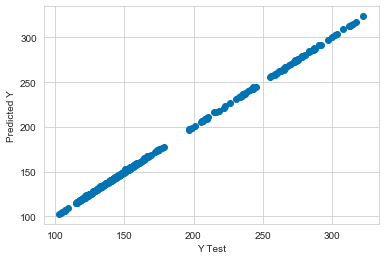

In [32]:
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

### Results

In [33]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.2903032878839913
MSE: 0.17011267504923983
RMSE: 0.4124471784959134


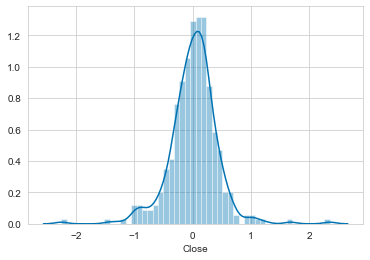

In [34]:
#RESIDUALS
sns.distplot((y_test-predictions),bins=50);